# Step 1 : Importing all the essential libraries and acquiring data set

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns

In [8]:
pip install imblearn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install imbalanced-learn

  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Windows\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =

very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate 

school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi- skilled/unskilled, 3 = &quot;white collar&quot;, 4 =

teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =

professional with advanced degree)

occupation_husb: husband&#39;s occupation (same coding as above)

affairs: time spent in extra-marital affairs

# Here we will use pasty.dmatrices, it’s main task is to analyze the independent variable and dependent variable and add some data if it is needed based on target variable. Renaming the features present in X so that it can be understandable by all.

In [3]:
dta = sm.datasets.fair.load_pandas().data
dta["affair"] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', dta, return_type= 'dataframe')
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

# Step 2 : Data Preprocessing
We want to make it classification problem for that we need to convert target 

variable (affairs) into binary class where if the value will be 0 then women had no 

any affair and 1 means women had been involved in several extra marital affairs.

In [4]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [5]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [6]:
df_y =pd.DataFrame(y)

# Now next step would be to check whether the dataset is balanced or not.

In [7]:
df_y.value_counts()

0.0    4313
1.0    2053
dtype: int64

# Checking is there any null value present in dataset or not .

In [8]:
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

In [9]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_2          6366 non-null   float64
 2   occ_3          6366 non-null   float64
 3   occ_4          6366 non-null   float64
 4   occ_5          6366 non-null   float64
 5   occ_6          6366 non-null   float64
 6   occ_husb_2     6366 non-null   float64
 7   occ_husb_3     6366 non-null   float64
 8   occ_husb_4     6366 non-null   float64
 9   occ_husb_5     6366 non-null   float64
 10  occ_husb_6     6366 non-null   float64
 11  rate_marriage  6366 non-null   float64
 12  age            6366 non-null   float64
 13  yrs_married    6366 non-null   float64
 14  children       6366 non-null   float64
 15  religious      6366 non-null   float64
 16  educ           6366 non-null   float64
dtypes: float64(17)
memory usage: 895.2 KB


# Step 3 : Data Visualization

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distribu

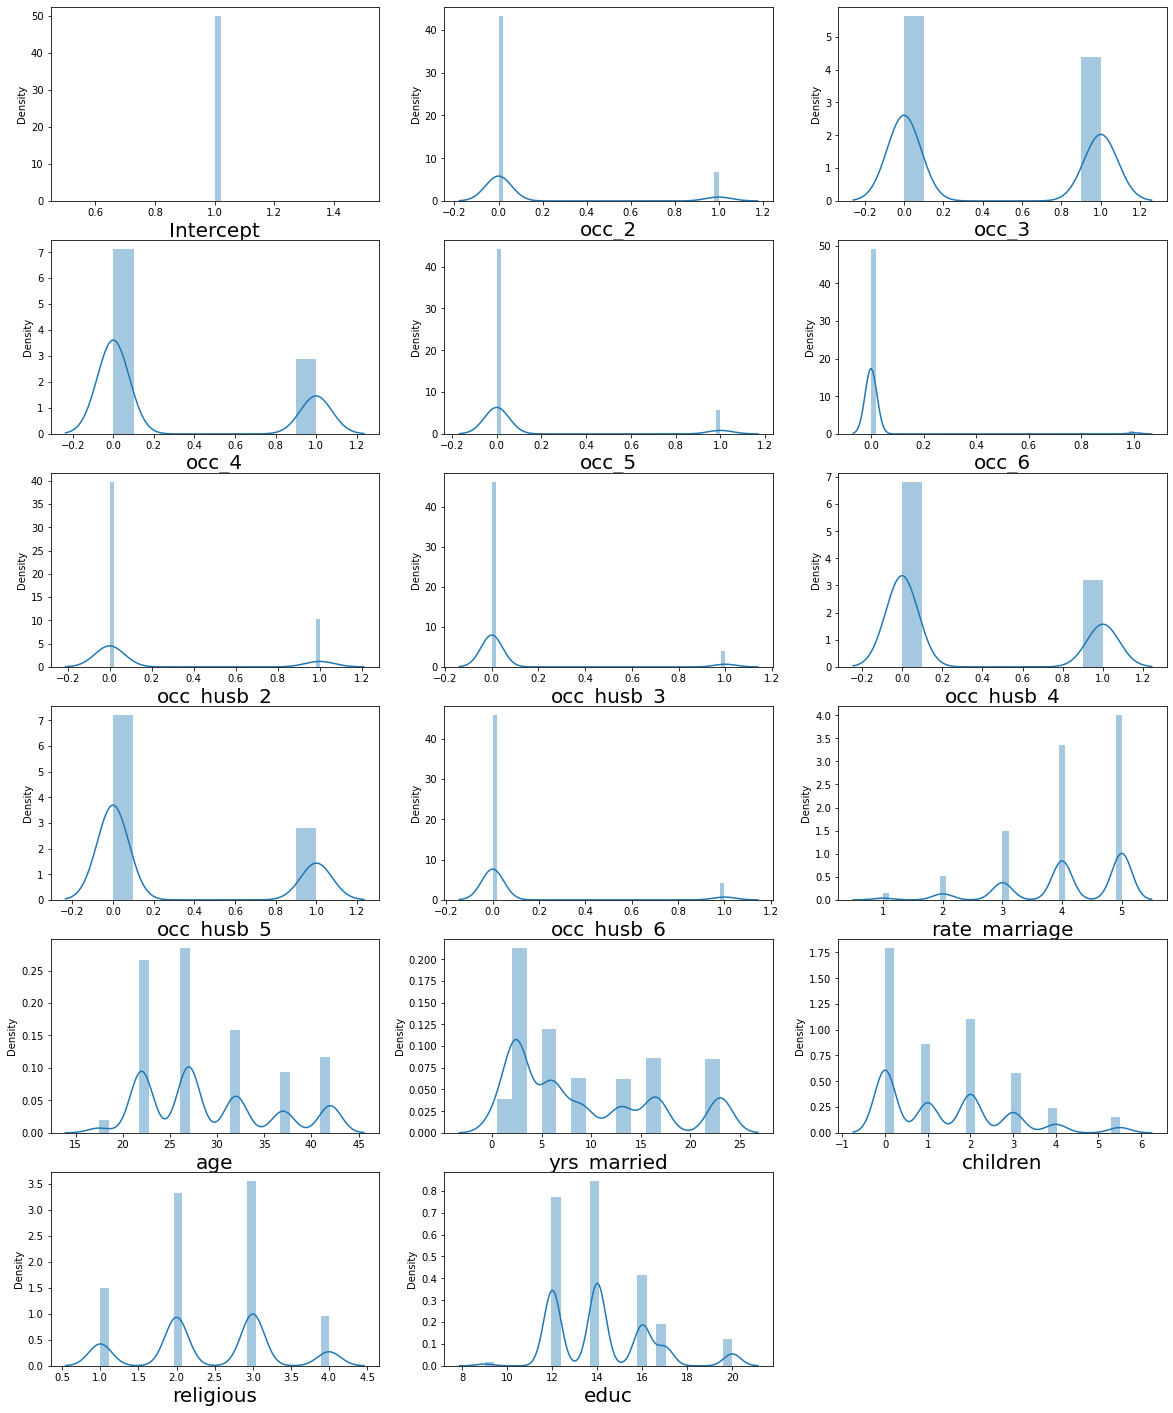

In [11]:
plt.figure(figsize=(20,25))
plot_number = 1
for column in X:
    if plot_number<18:
        plt.subplot(6,3,plot_number)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plot_number+=1
plt.show()

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows\anaconda

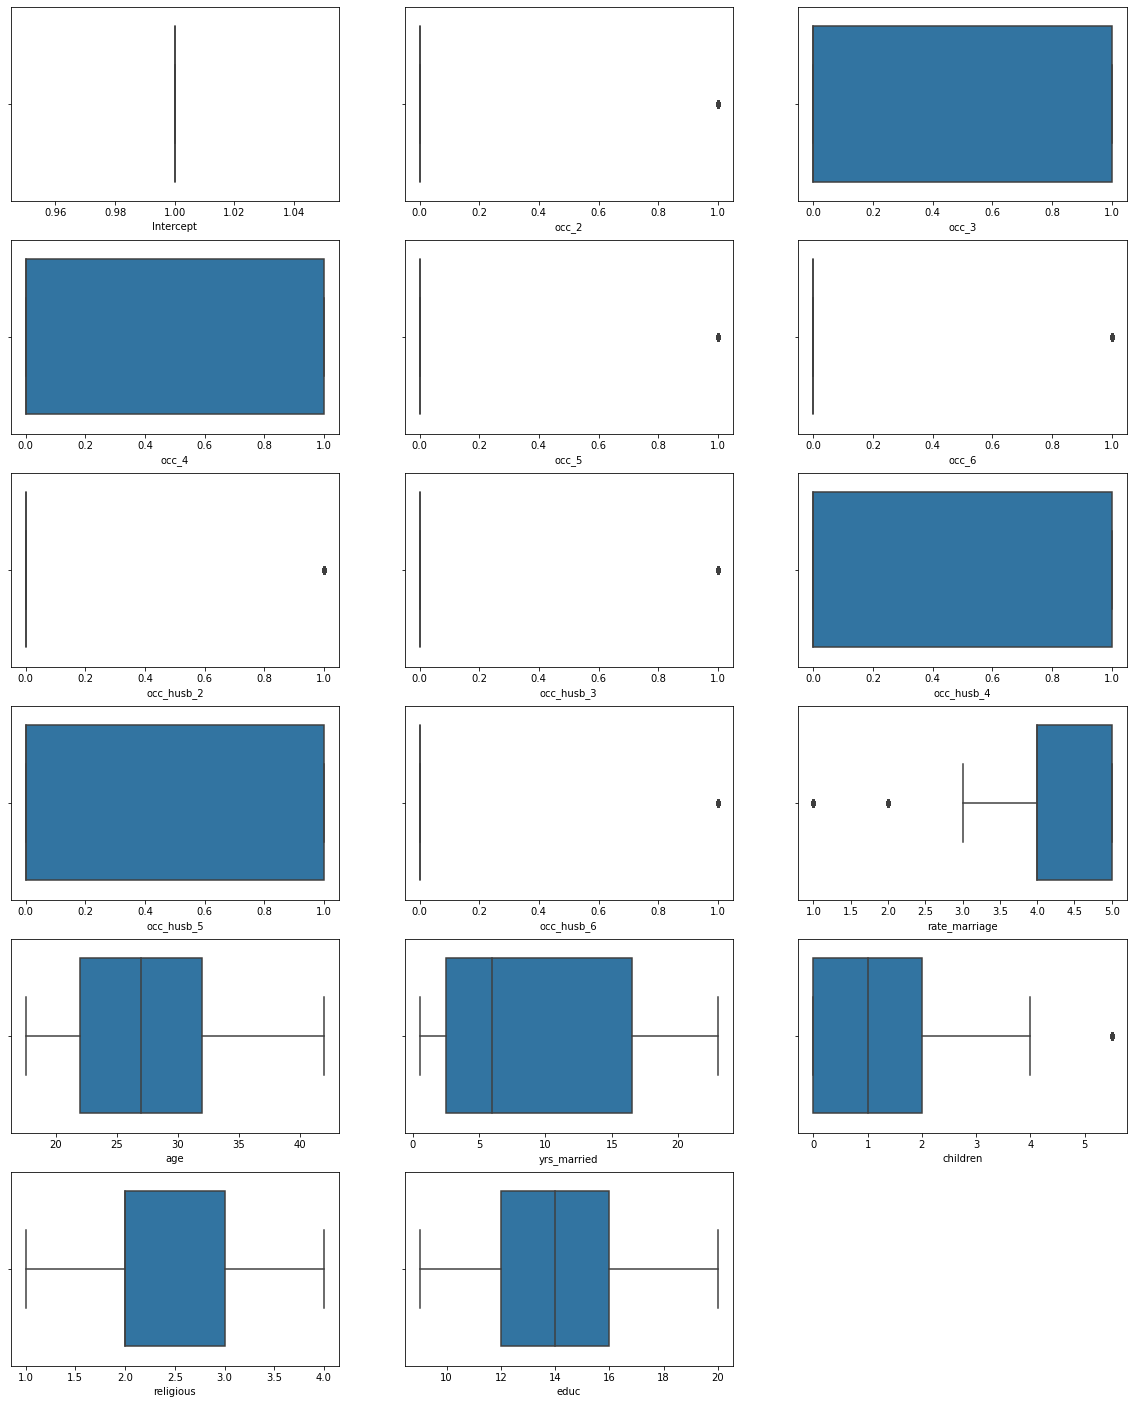

In [12]:
plt.figure(figsize=(20,25),facecolor="white")
plot_number = 1
for column in X:
    if plot_number<18:
        plt.subplot(6,3,plot_number)
        sns.boxplot(X[column])
        plt.xlabel(column)
    plot_number+=1
plt.show()

# Step 4 : Modeling
splitting the data into train and test set

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

# Making model and doing prediction

In [14]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = log_reg.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7160804020100503

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameter = {
    "penalty":['l1', 'l2', 'elasticnet'],
    "max_iter":[1000,2000,3000,20,36],
    "C":[1.0,2.0,0.1,.01,3.0,4.0]
}

In [20]:
clf = GridSearchCV(log_reg, parameter,cv=5)

In [21]:
clf.fit(x_train,y_train)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 0.1, 0.01, 3.0, 4.0],
                         'max_iter': [1000, 2000, 3000, 20, 36],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [22]:
clf.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}

In [23]:
clf.best_score_

0.726851504275193

In [24]:
log_reg = LogisticRegression(C= 1.0, max_iter= 2000, penalty= 'l2')

In [25]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [26]:
y_pred = log_reg.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7211055276381909

# Step 5 : Evaluation

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[971 113]
 [331 177]]
0.7211055276381909
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.81      1084
         1.0       0.61      0.35      0.44       508

    accuracy                           0.72      1592
   macro avg       0.68      0.62      0.63      1592
weighted avg       0.70      0.72      0.70      1592



In [30]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [68]:
ran_samp = RandomOverSampler(0.80)
x_train_samp,y_train_samp = ran_samp.fit_resample(x_train,y_train)
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_samp)))

The number of class before fit Counter({0.0: 3229, 1.0: 1545})
The number of class after fit Counter({0.0: 3229, 1.0: 2583})


C:\Users\Windows\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [69]:
log_reg = LogisticRegression(C= 1.0, max_iter= 2000, penalty= 'l2')

In [70]:
log_reg.fit(x_train_samp,y_train_samp)

LogisticRegression(max_iter=2000)

In [71]:
y_pred = log_reg.predict(x_test)

In [72]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7041457286432161

In [73]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[834 250]
 [221 287]]
0.7041457286432161
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1084
         1.0       0.53      0.56      0.55       508

    accuracy                           0.70      1592
   macro avg       0.66      0.67      0.66      1592
weighted avg       0.71      0.70      0.71      1592



In [74]:
import pickle

In [76]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(log_reg, open(filename, 'wb'))

In [81]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[1,1,0,0,0,0,0,0,0,0,0,3,22,13,4,1,14]])
a

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [77]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0
